In [4]:
### Import necessary packages
#pip install polygon-api-client
import pandas as pd
import numpy as np
import time
from datetime import date, timedelta, datetime
from polygon import RESTClient 
import plotly.graph_objects as go


import tensorflow


In [61]:
### Pass API key to server
client = RESTClient(api_key="mI71D28eiUAlYhFqveZpG2pyyxmI2JAp")

In [62]:
### Get start and end date
end_date = date.today() #- timedelta(days = 1)
start_date = end_date - timedelta(days = 2000)

In [128]:
### Get stock data
while True:
    ### Enter ticker
    ticker = input('Please enter the stock ticker: ').upper()
    
    aggs = []
    for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="day", from_=start_date, to=end_date, limit=500000):
        aggs.append(a)
    
    if not aggs:
        print("No valid data found for ticker:", ticker)
        print("Please try again.")
    else:
        break  # Valid data found, exit the loop

save_csv = input("Do you want to save the data as a CSV? Enter 'yes' or 'no': ").strip().lower()

# If the user answers 'yes', prompt for a file name and save the CSV
if save_csv == 'yes':
    # Prompt for a CSV file name
    csv_file_name = input("Please enter a filename for the CSV: ").strip()

    # Check if the user has included the .csv extension, if not, append it
    if not csv_file_name.lower().endswith('.csv'):
        csv_file_name += '.csv'

    # Use the to_csv method to save the DataFrame
    df.to_csv(csv_file_name, index=False)

    print(f"Data has been saved as {csv_file_name}")
else:
    print("Data has not been saved.")

input("Press Enter to exit")

Please enter the stock ticker: dis
Do you want to save the data as a CSV? Enter 'yes' or 'no': no
Data has not been saved.
Press Enter to exit


''

In [129]:
### Save data as pandas dataframe
df = pd.DataFrame(aggs)

### Add a new column date
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head(5)

,open,high,low,close,volume,vwap,timestamp,transactions,otc,date
0,152.12,152.50,149.29,150.43,10195818.0,150.5695,1639371600000,166583,None,2021-12-13 05:00:00
1,149.26,151.62,148.52,149.10,10872028.0,149.6117,1639458000000,160055,None,2021-12-14 05:00:00
2,148.76,150.92,147.35,150.40,12231479.0,148.9665,1639544400000,168336,None,2021-12-15 05:00:00
3,151.35,152.06,148.58,148.75,11145623.0,149.8507,1639630800000,160228,None,2021-12-16 05:00:00
4,148.51,149.84,146.57,148.76,13878798.0,148.6927,1639717200000,145849,None,2021-12-17 05:00:00


In [130]:
### Draw an interactive candalestick graph
#fig = go.Figure(data = [go.Candlestick(x = df['date'],
#                open = df['open'],
#                high = df['high'],
#                low = df['low'],
#                close = df['close'])])

#fig.show()


In [131]:
df_stock = df
df_stock.shape

(501, 10)

In [132]:
def add_lagged_features(df):
    # Adding lagged features for 'close' and 'volume' from lag 1 to lag 5
    for lag in range(1, 6):
        df[f'close_lag{lag}'] = df['close'].shift(lag)
        df[f'volume_lag{lag}'] = df['volume'].shift(lag)
        df[f'transactions_lag{lag}'] = df['transactions'].shift(lag)
        df[f'high_lag{lag}'] = df['high'].shift(lag)
        df[f'low_lag{lag}'] = df['low'].shift(lag)
        df[f'open_lag{lag}'] = df['open'].shift(lag)
    return df

In [133]:
df_stock = add_lagged_features(df_stock)

In [134]:
df_stock_prep = df_stock.drop(columns = ['timestamp','otc','open','high','low','volume','transactions','vwap'])
df_stock_prep = df_stock_prep.dropna()



In [135]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_apps[['feature1', 'feature2']] = scaler.fit_transform(df_apps[['feature1', 'feature2']])

In [136]:
#df_stock_prep['date'] = pd.to_datetime(df_stock_prep['date'])

# Extract just the date part
#df_stock_prep['date'] = df_stock_prep['date'].dt.date

In [137]:
df_stock_prep.set_index('date', inplace=True)

In [138]:
df_stock_prep.head()

,close,close_lag1,volume_lag1,transactions_lag1,high_lag1,low_lag1,open_lag1,close_lag2,volume_lag2,transactions_lag2,...,transactions_lag4,high_lag4,low_lag4,open_lag4,close_lag5,volume_lag5,transactions_lag5,high_lag5,low_lag5,open_lag5
date,,,,,,,,,,,,,,,,,,,,,
2021-12-20 05:00:00,146.47,148.76,13878798.0,145849.0,149.8400,146.57,148.51,148.75,11145623.0,160228.0,...,160055.0,151.62,148.52,149.26,150.43,10195818.0,166583.0,152.50,149.29,152.12
2021-12-21 05:00:00,151.05,146.47,11201921.0,167376.0,147.7300,145.08,146.98,148.76,13878798.0,145849.0,...,168336.0,150.92,147.35,148.76,149.10,10872028.0,160055.0,151.62,148.52,149.26
2021-12-22 05:00:00,151.88,151.05,10781406.0,153146.0,151.4250,147.39,147.56,146.47,11201921.0,167376.0,...,160228.0,152.06,148.58,151.35,150.40,12231479.0,168336.0,150.92,147.35,148.76
2021-12-23 05:00:00,153.63,151.88,7820439.0,121356.0,152.2000,149.87,150.42,151.05,10781406.0,153146.0,...,145849.0,149.84,146.57,148.51,148.75,11145623.0,160228.0,152.06,148.58,151.35
2021-12-27 05:00:00,152.80,153.63,6572351.0,117803.0,154.1899,151.93,152.32,151.88,7820439.0,121356.0,...,167376.0,147.73,145.08,146.98,148.76,13878798.0,145849.0,149.84,146.57,148.51


In [139]:
# Calculate the index for the split
split_idx = int(len(df_stock_prep) * 0.8)

# Split the data into training and testing sets
train = df_stock_prep[:split_idx]
test = df_stock_prep[split_idx:]

In [140]:
X = train.drop('close', axis=1)

In [141]:
X_train = train.drop('close', axis=1)
y_train = train['close']
X_test = test.drop('close', axis=1)
y_test = test['close']

In [142]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 15.119710543800249
R² Score: 0.20320956746467034


Text(0, 0.5, 'Feature')

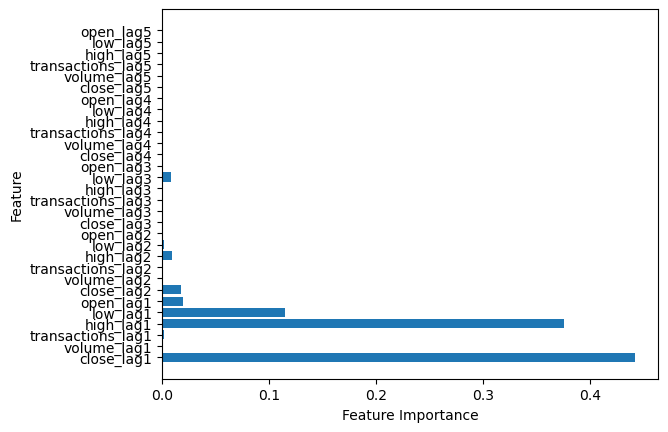

In [144]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [145]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\16784\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\16784\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\16784\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\16784\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\16784\anaconda3\Lib\site-packag

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [146]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


optimized_rf = RandomForestRegressor(**best_params)

# Train the optimized model
optimized_rf.fit(X_train, y_train)

y_pred = optimized_rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error: 14.937421118239008
R² Score: 0.21281599940123386


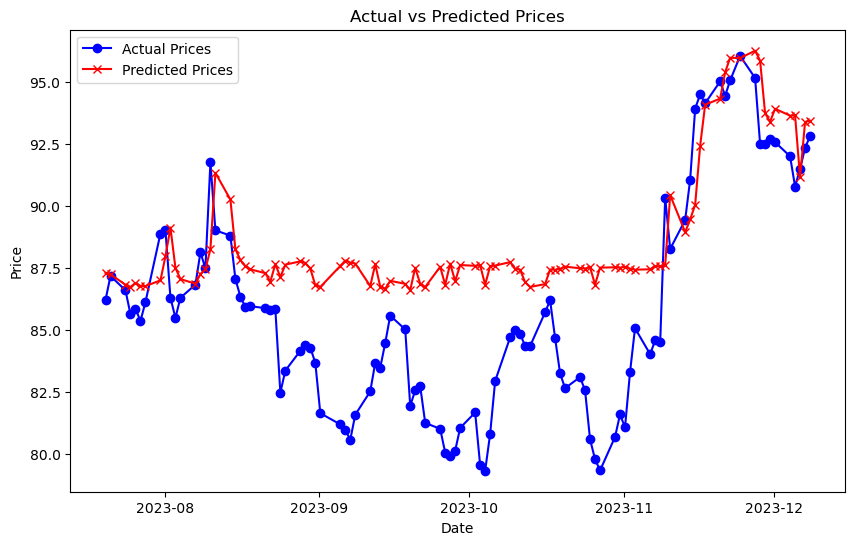

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', marker='x')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

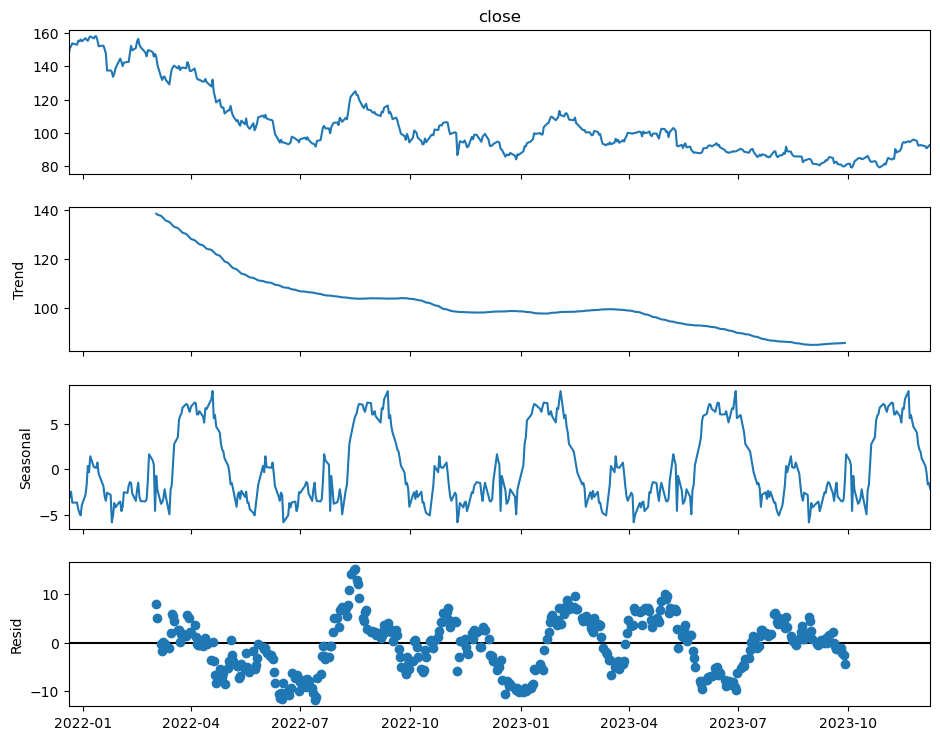

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_stock_prep['close'], model='additive', period=100) # Adjust 'period' based on your data
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

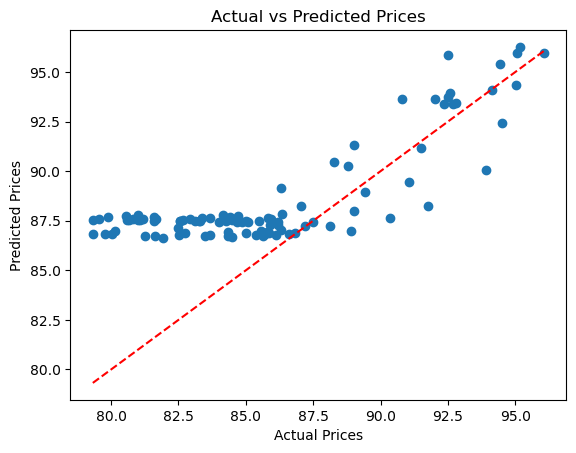

In [149]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
# Plotting a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

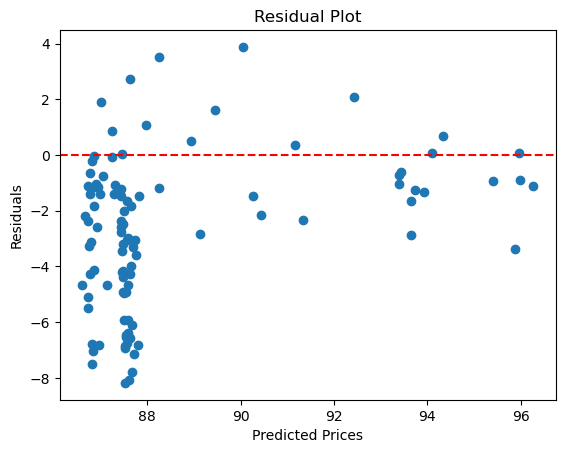

In [150]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

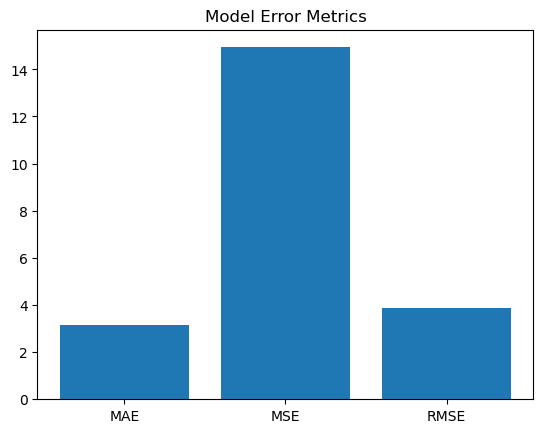

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Error Metrics')
plt.show()

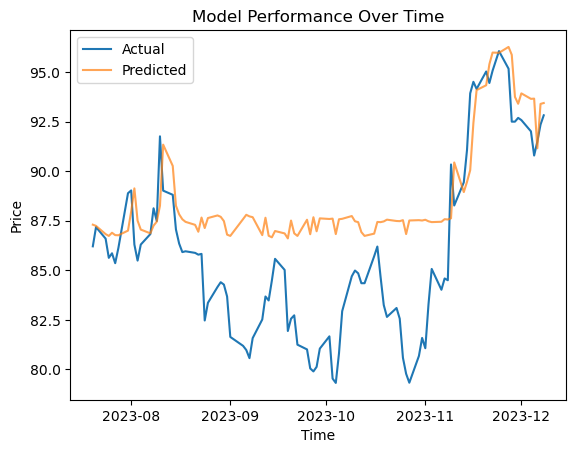

In [152]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Model Performance Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [153]:
df_back_test = pd.DataFrame({'actual_price': y_test, 'predicted_price': y_pred})
df_back_test.head()

,actual_price,predicted_price
date,,
2023-07-20 04:00:00,86.21,87.303815
2023-07-21 04:00:00,87.18,87.241167
2023-07-24 04:00:00,86.60,86.827139
2023-07-25 04:00:00,85.63,86.735776
2023-07-26 04:00:00,85.86,86.895664


In [154]:

# Initialize variables
cash = 100000  # Starting cash
holdings = 0  # Number of stocks held
portfolio_value = cash  # Total portfolio value

# List to store trade data
trades = []

# Loop through each day in your test data
for index, row in df_back_test.iterrows():
    trade_info = {
        'date': index,
        'actual_price': row['actual_price'],
        'predicted_price': row['predicted_price']
    }

    if row['predicted_price'] > row['actual_price'] and cash >= row['actual_price'] * 50:
        # Buy one unit
        holdings += 50
        cash -= row['actual_price']*50
        trade_info['action'] = 'BUY'
    elif row['predicted_price'] < row['actual_price'] and holdings > 50:
        # Sell one unit
        holdings -= 50
        cash += row['actual_price']*50
        trade_info['action'] = 'SELL'
    else:
        trade_info['action'] = 'HOLD'

    # Calculate the new portfolio value
    new_portfolio_value = cash + holdings * row['actual_price']
    
    # Calculate return from this trade
    trade_return = new_portfolio_value - portfolio_value
    trade_return = new_portfolio_value / 100000 - 1
    portfolio_value = new_portfolio_value
    trade_info['cash'] = cash
    trade_info['holdings'] = holdings
    trade_info['trade_return'] = trade_return
    trade_info['portfolio_value'] = new_portfolio_value
    
    trade_info['portfolio_return'] = trade_return
    trades.append(trade_info)

# Convert list of dictionaries to DataFrame
trades_df = pd.DataFrame(trades)

# Display the DataFrame
print(trades_df)

                  date  actual_price  predicted_price action     cash  \
0  2023-07-20 04:00:00         86.21        87.303815    BUY  95689.5   
1  2023-07-21 04:00:00         87.18        87.241167    BUY  91330.5   
2  2023-07-24 04:00:00         86.60        86.827139    BUY  87000.5   
3  2023-07-25 04:00:00         85.63        86.735776    BUY  82719.0   
4  2023-07-26 04:00:00         85.86        86.895664    BUY  78426.0   
..                 ...           ...              ...    ...      ...   
95 2023-12-04 05:00:00         92.01        93.649858   HOLD   2645.5   
96 2023-12-05 05:00:00         90.79        93.661711   HOLD   2645.5   
97 2023-12-06 05:00:00         91.50        91.157225   SELL   7220.5   
98 2023-12-07 05:00:00         92.35        93.395567    BUY   2603.0   
99 2023-12-08 05:00:00         92.82        93.439978   HOLD   2603.0   

    holdings  trade_return  portfolio_value  portfolio_return  
0         50      0.000000         100000.0          0.0000

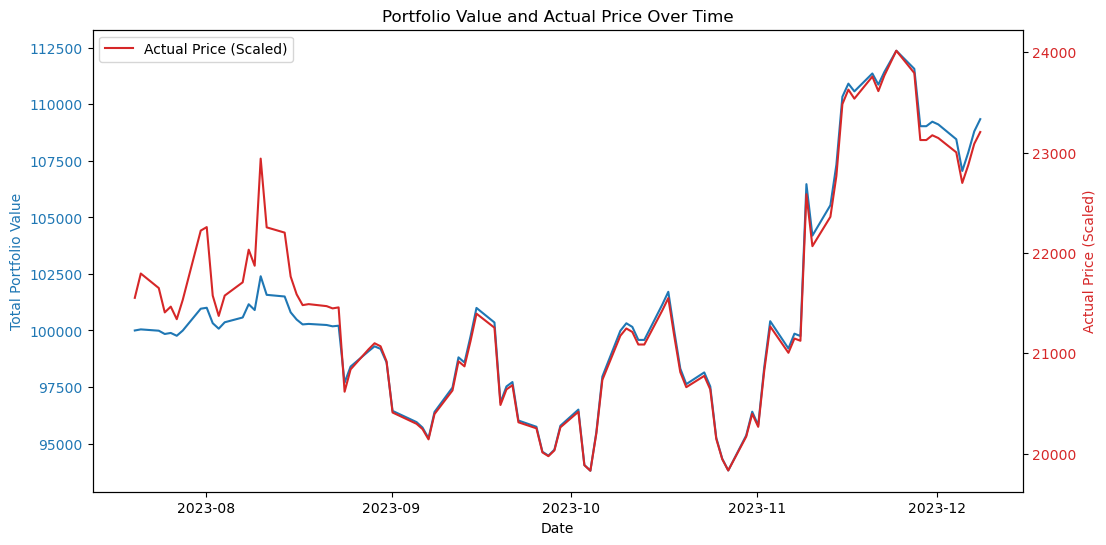

In [155]:

# Assuming trades_df has columns 'date', 'portfolio_value', and 'actual_price'
plt.figure(figsize=(12, 6))

# Create the first plot with the primary y-axis
plt.plot(trades_df['date'], trades_df['portfolio_value'], label='Portfolio Value', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value', color='tab:blue')
plt.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the 'actual_price'
ax2 = plt.gca().twinx()  # Get the current axes and create a twin y-axis
ax2.plot(trades_df['date'], trades_df['actual_price'] * 250, label='Actual Price (Scaled)', color='tab:red')
ax2.set_ylabel('Actual Price (Scaled)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and show legend
plt.title('Portfolio Value and Actual Price Over Time')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [156]:

# Initialize variables
cash = 100000  # Starting cash
holdings = 0  # Number of stocks held
portfolio_value = cash  # Total portfolio value

# List to store trade data
trades = []

# Loop through each day in your test data
for index, row in df_back_test.iterrows():
    trade_info = {
        'date': index,
        'actual_price': row['actual_price'],
        'predicted_price': row['predicted_price']
    }

    if row['predicted_price'] > row['actual_price']:
        # Buy one unit
        holdings += 50
        cash -= row['actual_price']*50
        trade_info['action'] = 'BUY'
    elif row['predicted_price'] < row['actual_price']:
        # Sell one unit
        holdings -= 50
        cash += row['actual_price']*50
        trade_info['action'] = 'SELL'
    else:
        trade_info['action'] = 'HOLD'

    # Calculate the new portfolio value
    new_portfolio_value = cash + holdings * row['actual_price']
    
    # Calculate return from this trade
    trade_profit = new_portfolio_value - portfolio_value
    trade_return = new_portfolio_value / 100000 - 1
    
    portfolio_value = new_portfolio_value
    trade_info['cash'] = cash
    trade_info['holdings'] = holdings
    trade_info['trade_profit'] = trade_profit
    trade_info['portfolio_value'] = new_portfolio_value
    trade_info['portfolio_return'] = trade_return
    
    trades.append(trade_info)

# Convert list of dictionaries to DataFrame
trades_df = pd.DataFrame(trades)

# Display the DataFrame
print(trades_df)

                  date  actual_price  predicted_price action      cash  \
0  2023-07-20 04:00:00         86.21        87.303815    BUY   95689.5   
1  2023-07-21 04:00:00         87.18        87.241167    BUY   91330.5   
2  2023-07-24 04:00:00         86.60        86.827139    BUY   87000.5   
3  2023-07-25 04:00:00         85.63        86.735776    BUY   82719.0   
4  2023-07-26 04:00:00         85.86        86.895664    BUY   78426.0   
..                 ...           ...              ...    ...       ...   
95 2023-12-04 05:00:00         92.01        93.649858    BUY -191889.5   
96 2023-12-05 05:00:00         90.79        93.661711    BUY -196429.0   
97 2023-12-06 05:00:00         91.50        91.157225   SELL -191854.0   
98 2023-12-07 05:00:00         92.35        93.395567    BUY -196471.5   
99 2023-12-08 05:00:00         92.82        93.439978    BUY -201112.5   

    holdings  trade_profit  portfolio_value  portfolio_return  
0         50           0.0         100000.0    

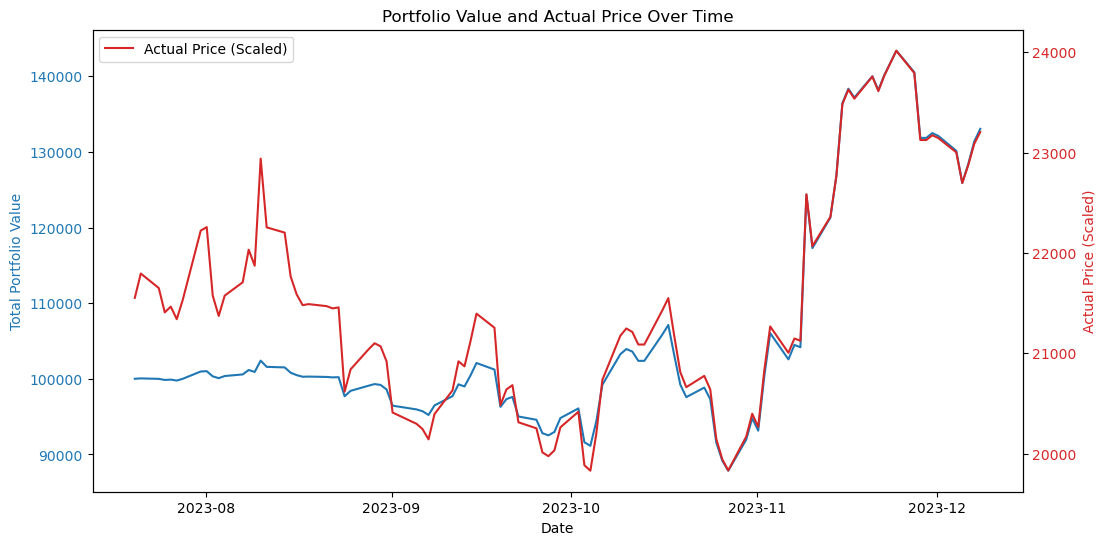

In [157]:

# Assuming trades_df has columns 'date', 'portfolio_value', and 'actual_price'
plt.figure(figsize=(12, 6))

# Create the first plot with the primary y-axis
plt.plot(trades_df['date'], trades_df['portfolio_value'], label='Portfolio Value', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value', color='tab:blue')
plt.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the 'actual_price'
ax2 = plt.gca().twinx()  # Get the current axes and create a twin y-axis
ax2.plot(trades_df['date'], trades_df['actual_price'] * 250, label='Actual Price (Scaled)', color='tab:red')
ax2.set_ylabel('Actual Price (Scaled)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and show legend
plt.title('Portfolio Value and Actual Price Over Time')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [158]:
trades_df.to_csv(r'C:\Users\16784\Documents\Python Scripts\trades.csv')